### 06th july 

### Churn data set

## Project Machine Learning Assisgnment- classification model.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"/Users/apple/Downloads/churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


<AxesSubplot:xlabel='gender,MultipleLines'>

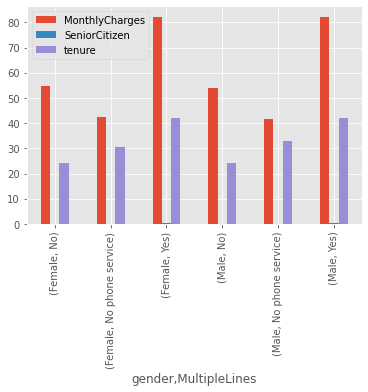

In [7]:
tab = pd.pivot_table(data = df,index= ['gender','MultipleLines'],aggfunc= np.mean)

tab.plot(kind = 'bar')



In [8]:
tab = pd.pivot_table(data = df,index= ['gender','InternetService'],aggfunc= np.mean)

tab

MonthlyCharges  SeniorCitizen     tenure
gender InternetService                                          
Female DSL                   58.590741       0.103535  32.822391
       Fiber optic           91.472569       0.273020  32.389569
       No                    21.110710       0.028112  31.024096
Male   DSL                   57.631427       0.110300  32.820762
       Fiber optic           91.527868       0.263772  33.449773
       No                    21.048973       0.039795  30.089859

In [9]:
tab = pd.pivot_table(data = df,index = ['gender','Contract'],aggfunc= np.mean)

tab

MonthlyCharges  SeniorCitizen     tenure
gender Contract                                                
Female Month-to-month       66.652623       0.207273  17.974026
       One year             66.841643       0.140669  42.445682
       Two year             60.513373       0.080473  56.086391
Male   Month-to-month       66.147615       0.209231  18.098462
       One year             63.343444       0.117881  41.663576
       Two year             61.025941       0.090588  57.380000

In [10]:
tab = pd.pivot_table(data= df,index = ['gender','PaymentMethod'],aggfunc= np.mean)

tab

MonthlyCharges  SeniorCitizen     tenure
gender PaymentMethod                                                      
Female Bank transfer (automatic)       67.662373       0.142132  43.336294
       Credit card (automatic)         67.731782       0.146277  43.405585
       Electronic check                75.737350       0.252991  24.373504
       Mailed check                    44.431170       0.064267  22.059126
Male   Bank transfer (automatic)       66.703042       0.160053  43.990741
       Credit card (automatic)         65.321494       0.144156  43.136364
       Electronic check                76.763431       0.249372  25.958996
       Mailed check                    43.437470       0.052758  21.616307

## Groupby 

In [11]:
df.groupby('MultipleLines').mean()

,SeniorCitizen,tenure,MonthlyCharges
MultipleLines,,,
No,0.110029,24.134808,54.195059
No phone service,0.152493,31.737537,42.028592
Yes,0.223830,41.914507,82.036974


In [12]:
df.groupby('gender').mean()

,SeniorCitizen,tenure,MonthlyCharges
gender,,,
Female,0.162844,32.244553,65.204243
Male,0.161463,32.495359,64.327482


In [13]:
df.groupby(['InternetService']).mean()

,SeniorCitizen,tenure,MonthlyCharges
InternetService,,,
DSL,0.106981,32.821561,58.102169
Fiber optic,0.268411,32.917959,91.500129
No,0.034076,30.547182,21.079194


#### Visualizations 

### Exploratory Data Analysis

Univariate analysis
- Numerical variable 
    - Histogram
    - Distplot
    - Kdeplot
    - Boxplot

- Categorical variables
    - Pieplot
    - Countplot

Bivariate Analysis
- Numerical Variable and Numerical variables
    - Scatterplot
    - Regplot
    - Relplot
    - Jointplot

- Numerical and Categorical Variable
    - Barplot
    - Boxplot
    - Violinplot
    - Lineplot

- Categorical and categorical variable
    - pd.crosstab(cat,cat)
    Barplot on above expression

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

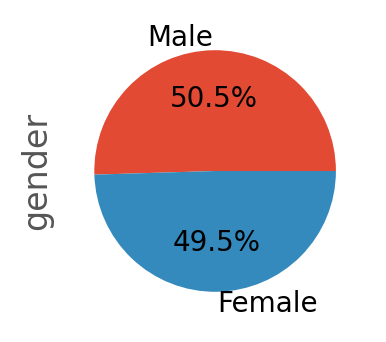

In [15]:
## Gender 
plt.figure(figsize=(3,2),dpi =200)
round(df['gender'].value_counts()/df.shape[0]*100,2).plot.pie(autopct ='%1.1f%%')
plt.show()


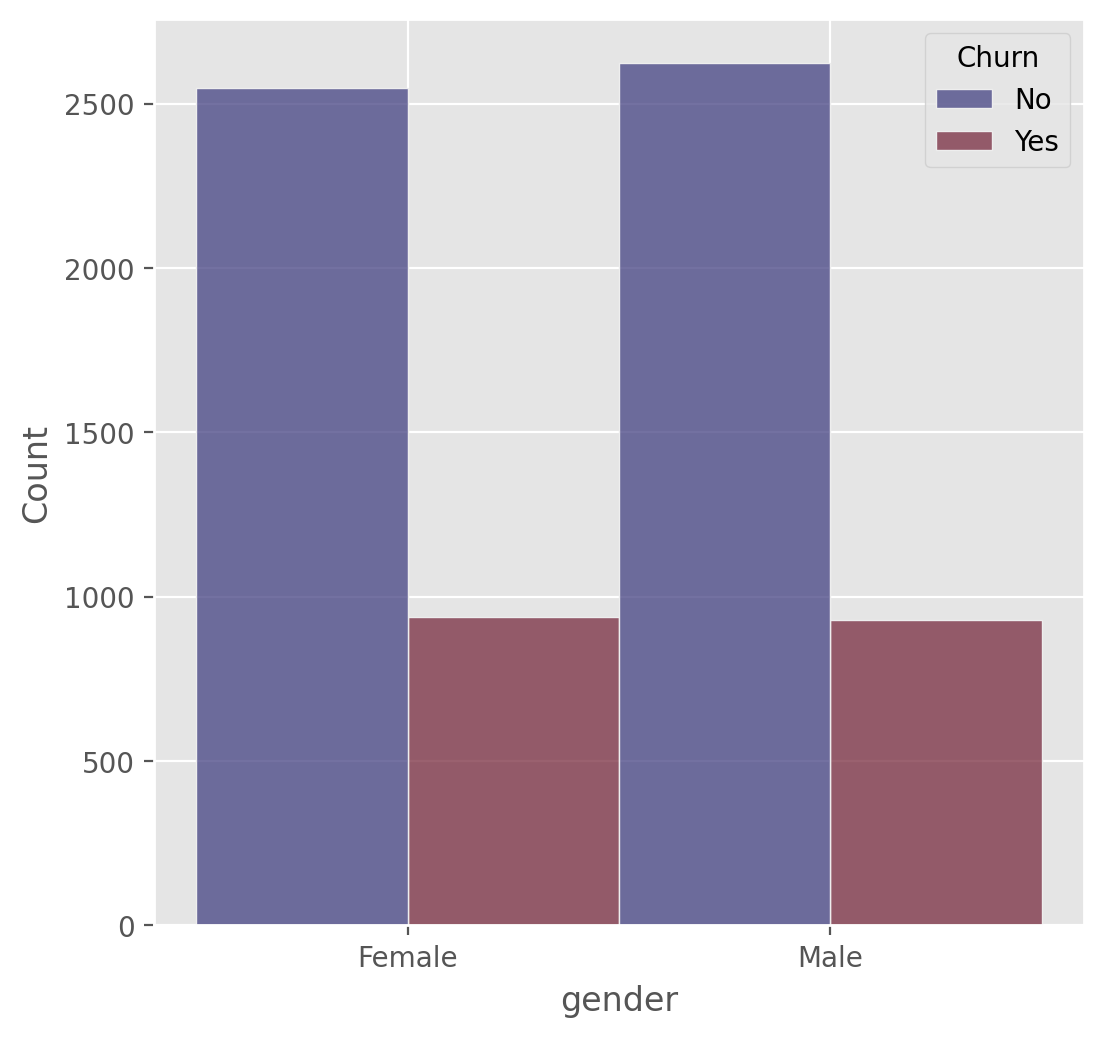

In [16]:
plt.figure(figsize=(6,6),dpi = 200)
sns.histplot(data = df,x = 'gender',multiple= 'dodge',hue= 'Churn',palette= 'icefire')
plt.show()

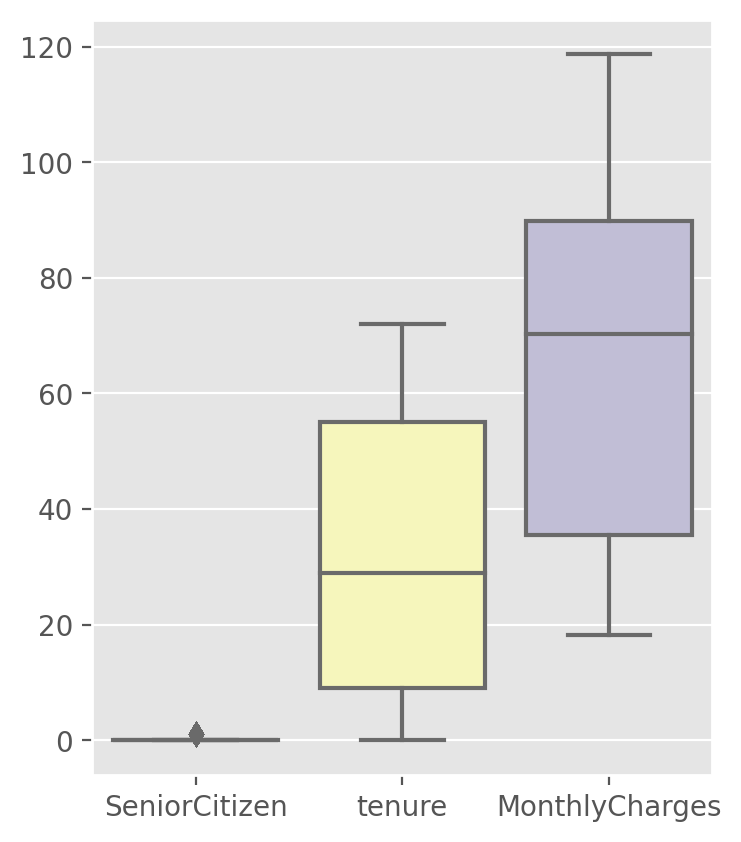

In [17]:
plt.figure(figsize=(4,5),dpi = 200)
sns.boxplot(data = df,palette='Set3')
plt.show()

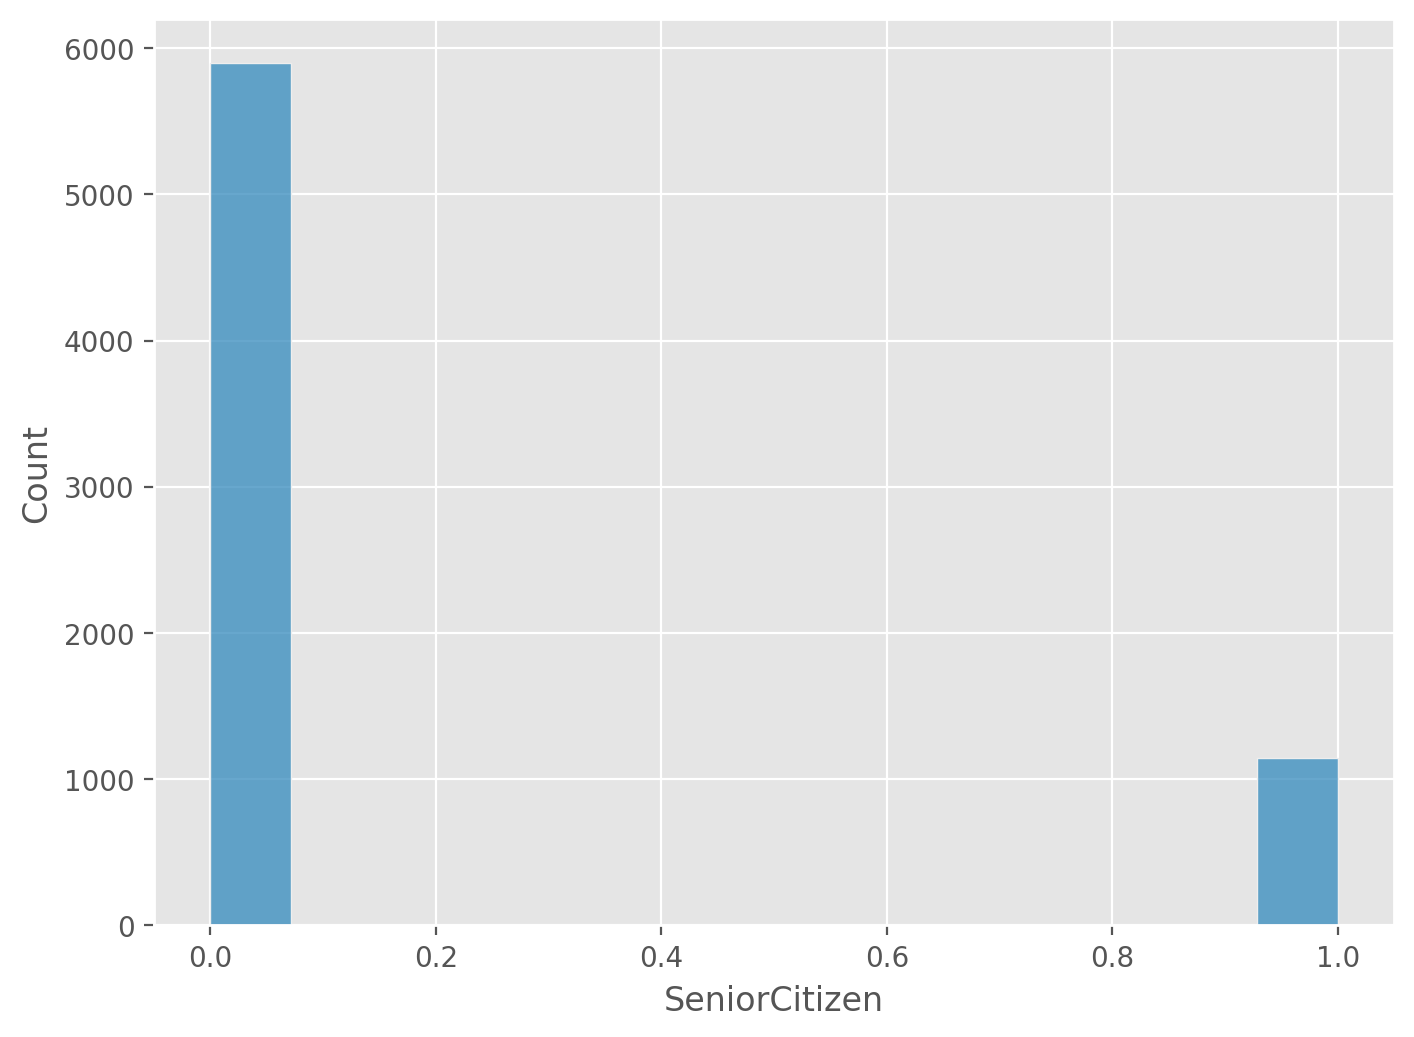

In [18]:
plt.figure(figsize = (8,6),dpi =200)

sns.histplot(df['SeniorCitizen'],hue_order='Churn')

plt.show()

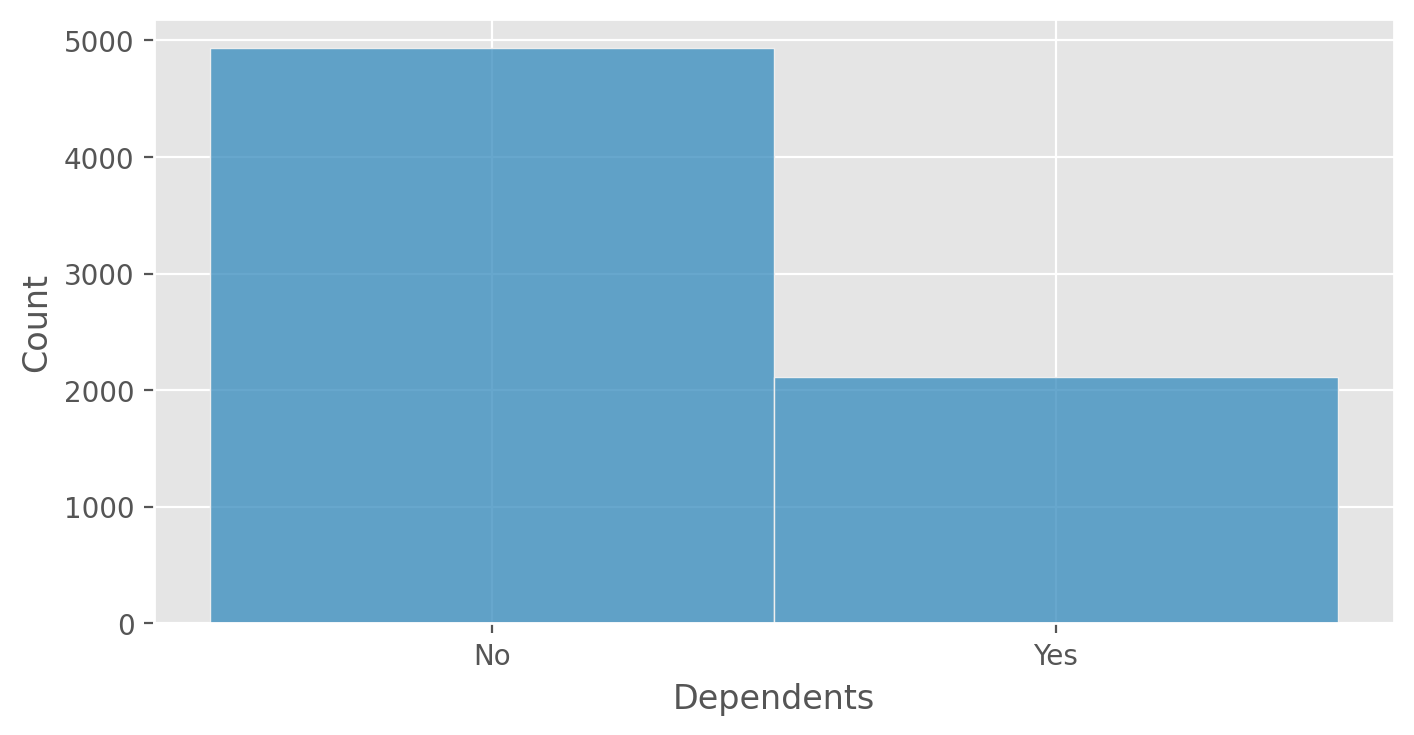

In [19]:
plt.figure(figsize = (8,4),dpi = 200)
sns.histplot(df['Dependents'],hue_order= 'Churn')
plt.show()

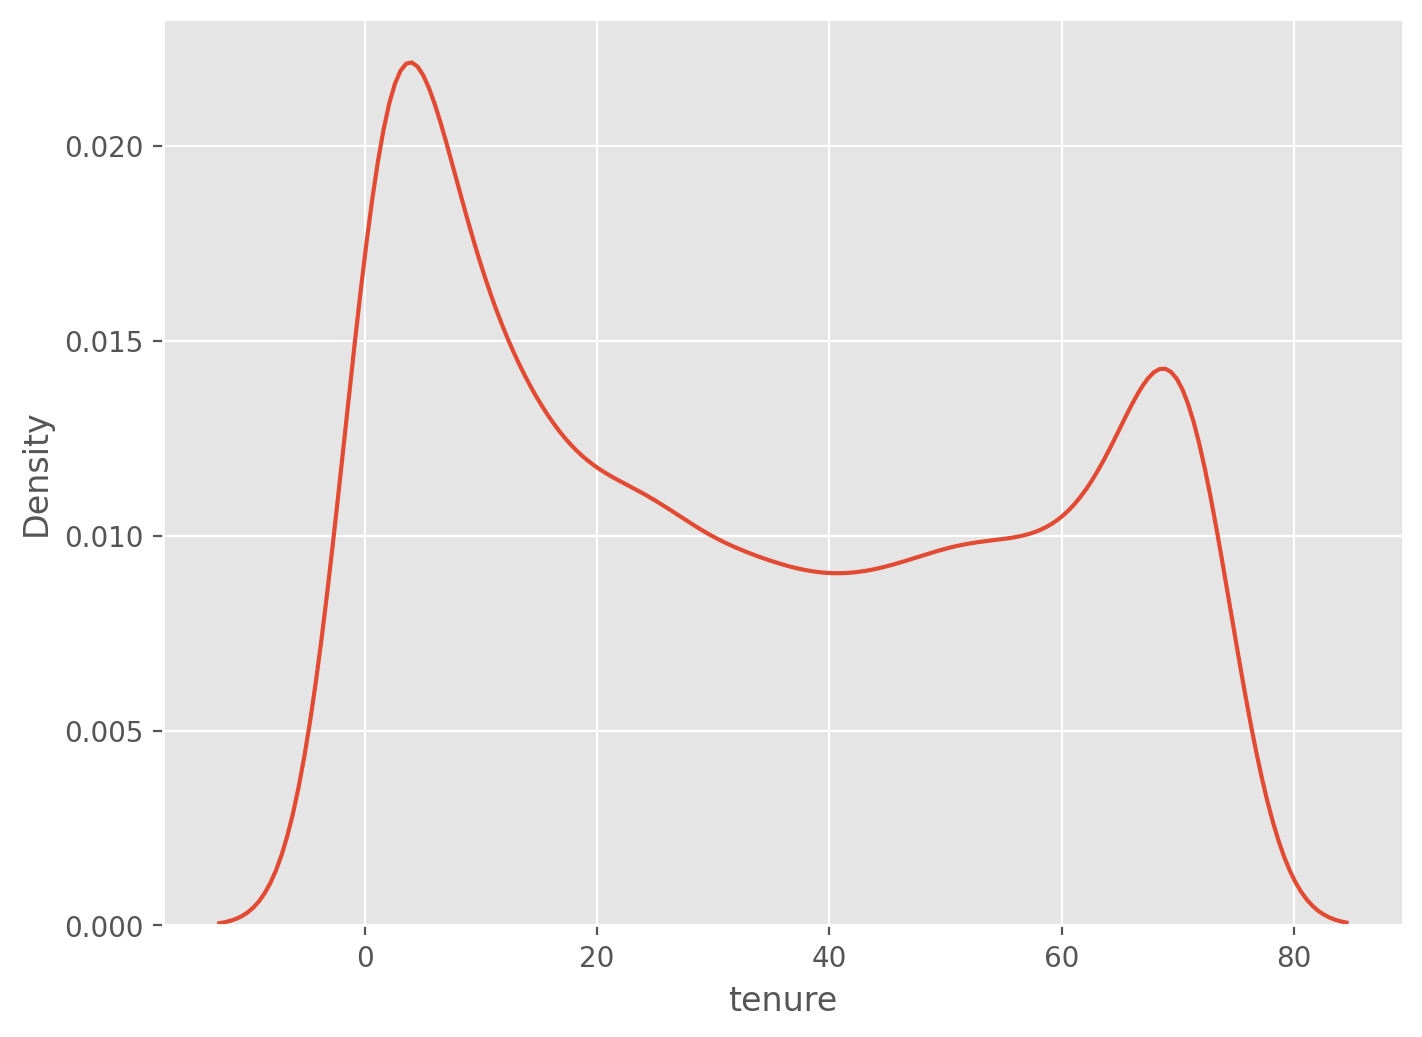

In [20]:
plt.figure(figsize = (8,6),dpi =200)

sns.kdeplot('tenure',data = df,hue_order= 'Churn')
plt.show()

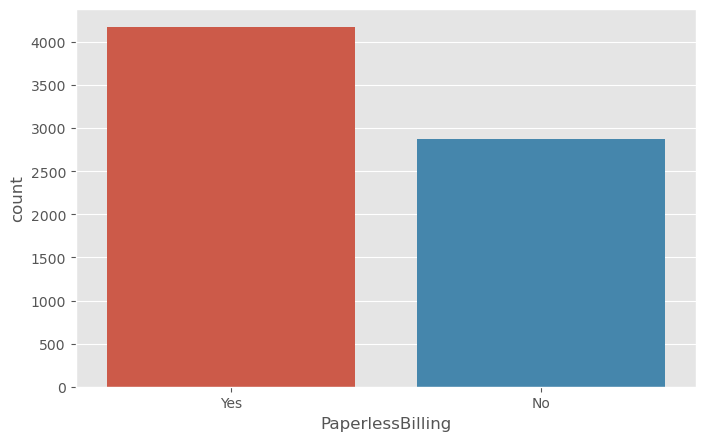

In [21]:
plt.figure(figsize = (8,5),dpi = 100)

sns.countplot('PaperlessBilling',data = df,hue_order= 'Churn')


plt.show()

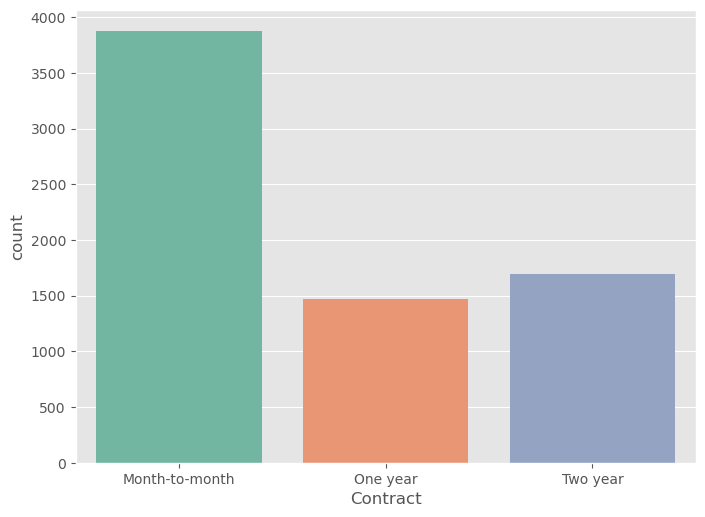

In [22]:
plt.figure(figsize = (8,6),dpi = 100)

sns.countplot('Contract',data = df,hue_order= 'Churn',palette= 'Set2')

plt.show()

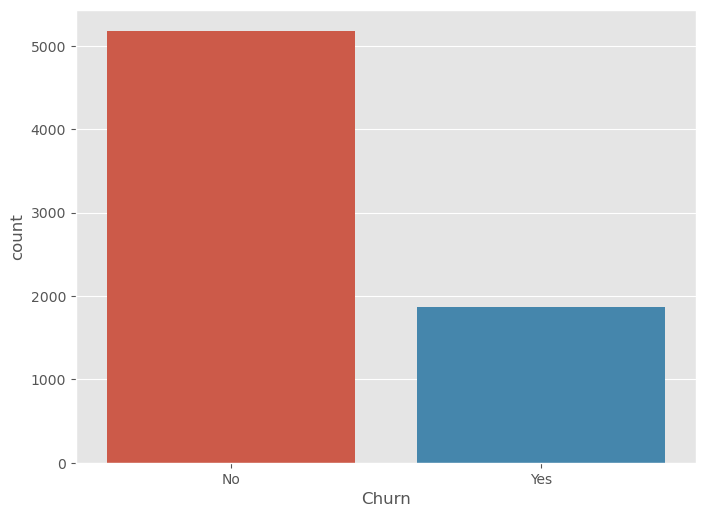

In [23]:
plt.figure(figsize = (8,6),dpi = 100)

sns.countplot(df['Churn'])
plt.show()

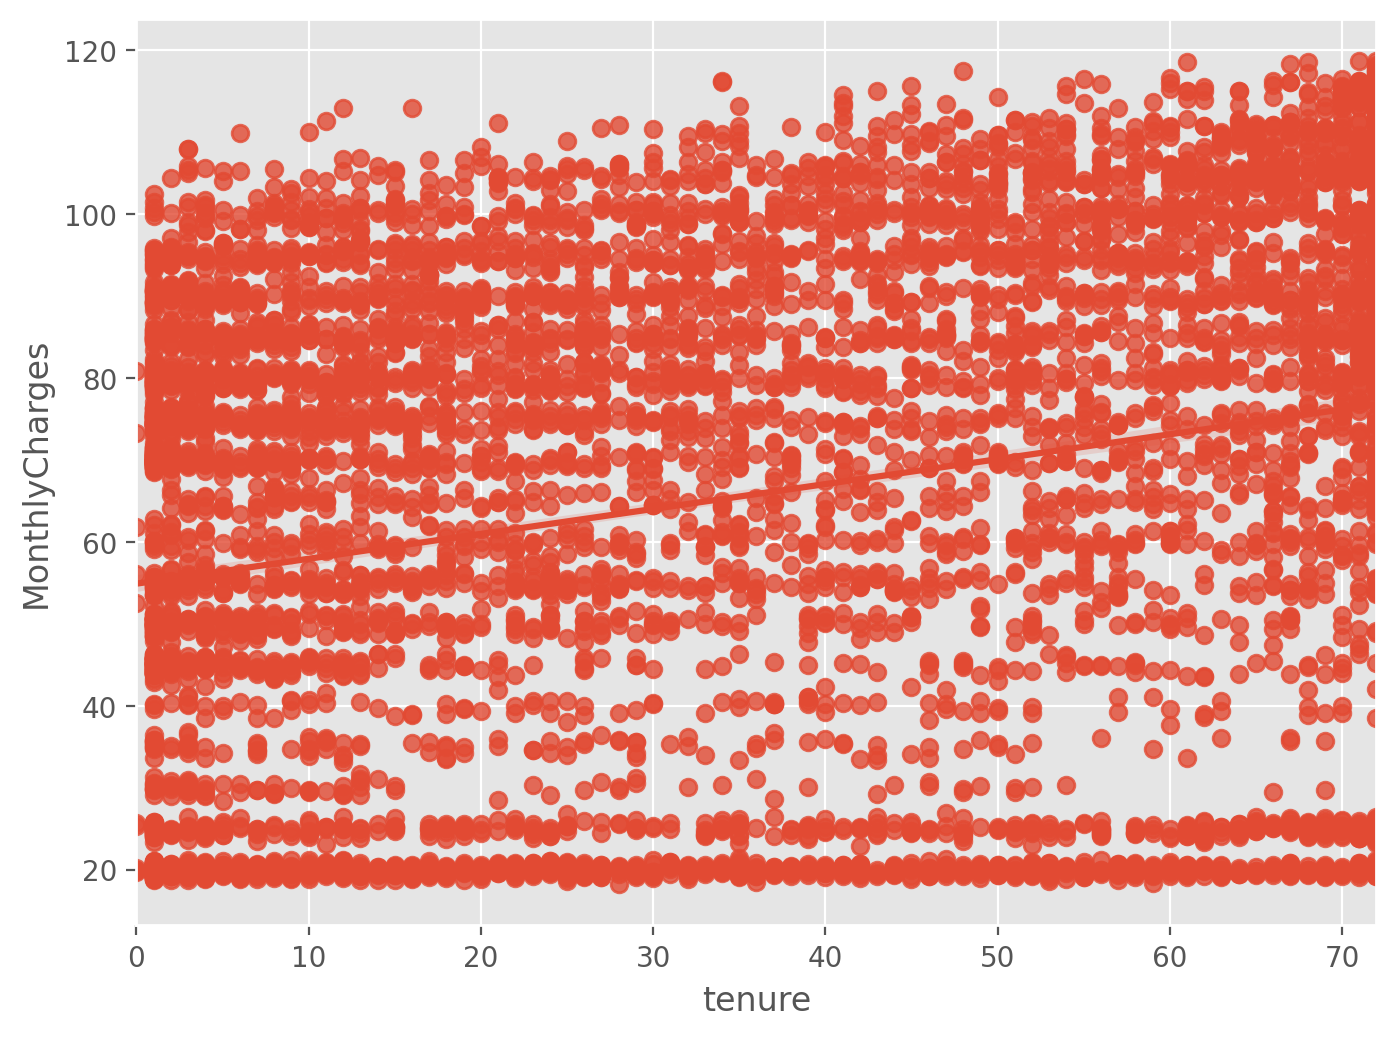

In [24]:
plt.figure(figsize = (8,6),dpi = 200)
sns.regplot('tenure','MonthlyCharges',data = df)

plt.show()

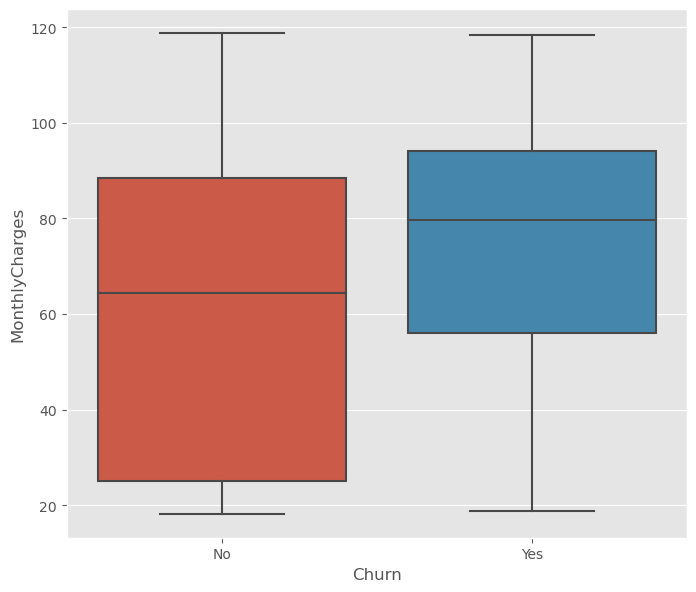

In [25]:
plt.figure(figsize = (8,7),dpi = 100)

sns.boxplot('Churn','MonthlyCharges',data= df)
plt.show()

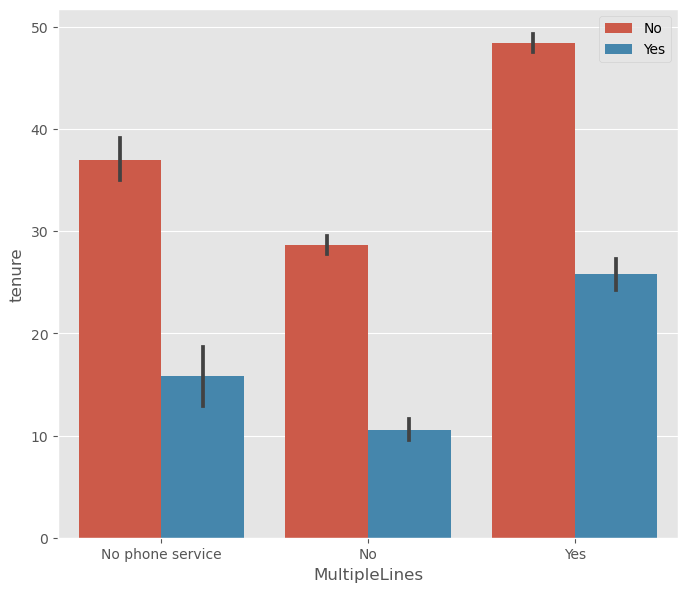

In [26]:
plt.figure(figsize = (8,7),dpi =100)

sns.barplot('MultipleLines','tenure',data = df,hue = 'Churn')
plt.legend()
plt.show()

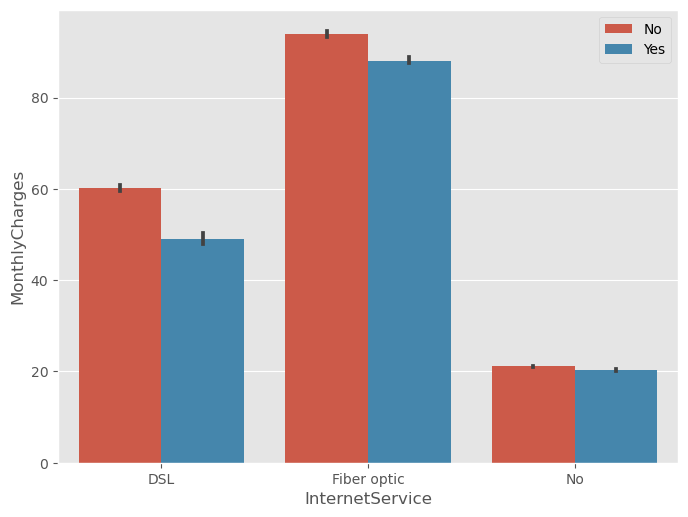

In [27]:
plt.figure(figsize = (8,6),dpi =100)

sns.barplot('InternetService','MonthlyCharges',data = df,hue = 'Churn')
plt.legend()
plt.show()

<Figure size 1600x1200 with 0 Axes>

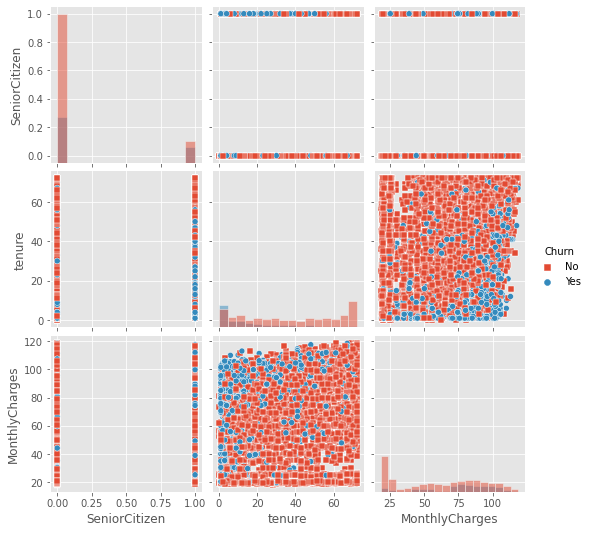

In [28]:
plt.figure(figsize = (8,6),dpi = 200)

sns.pairplot(df,'Churn', markers=['s','o'],diag_kind="hist")

plt.show()

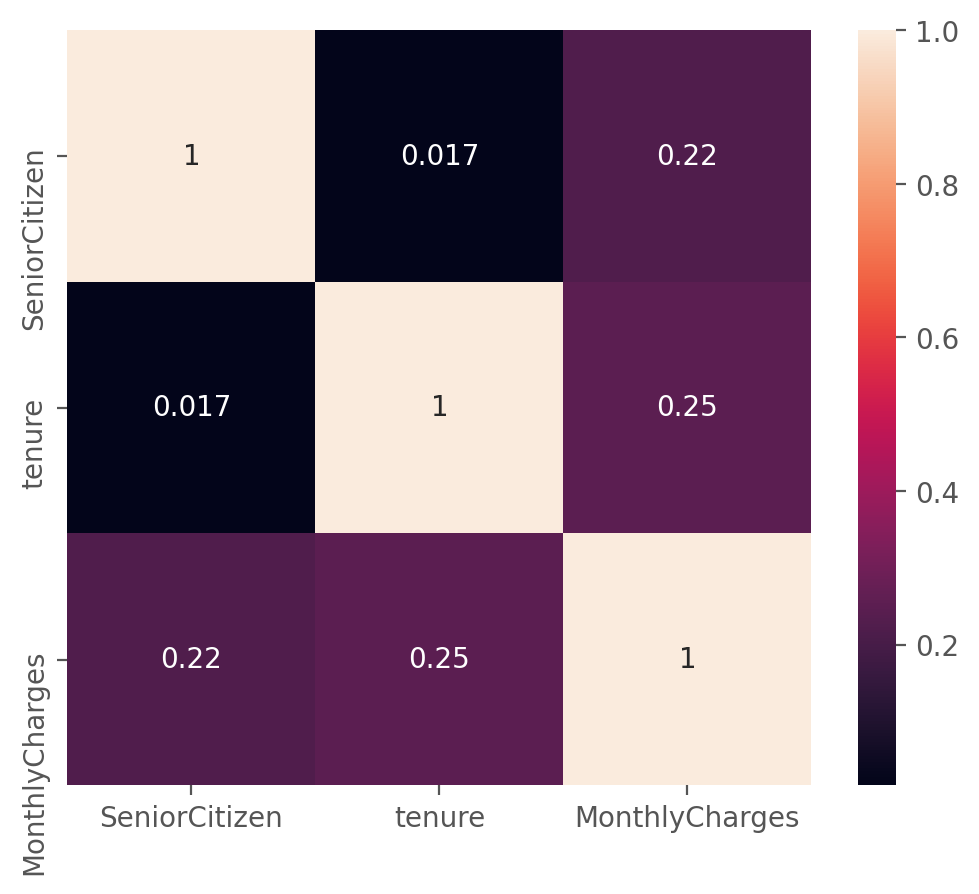

In [29]:
plt.figure(figsize = (6,5),dpi = 200)
Churn = df.corr()

sns.heatmap(Churn,annot = True)
plt. show()



### Observation:
- In gender male percent is high difference is 1%.
- No outliers.
- Customers preffer Month-to-month charges compared to yearly.
- Fiber optic is low.

### Machine Learning 

####### data preprocessing in here we deal with null values, missing values to make sure our data is in line to proceed further steps.

In [30]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [31]:
df.drop_duplicates(inplace= True)


In [32]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

""""""
Here we don't need customer id as it have unique value and no use in this data we use drop function to get ride of the 
customer id.
""""""

In [33]:
df.drop(["customerID"],axis = 1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [35]:
df1 = df.copy()   # copied the data of df to df1.

In [36]:
df1['Churn'].replace(to_replace = 'Yes',value = 1,inplace= True)  ## replacing yes with 1
df1['Churn'].replace(to_replace = 'No',value= 2,inplace = True)  # replacing no with 0.



In [37]:
df2 = pd.get_dummies(df1)
"creating dummy columns."
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,2,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,2,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,2,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


#### Machine Learning models .
- Logistic Rgression
*  KNN
- Random Forest
* Decision Tree
- Support vector machines.

In [38]:
df2.isnull().sum()      ###### Total charges have null values .

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [39]:
df2.drop('TotalCharges',axis =1 ,inplace = True)

In [40]:
df2.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Paperle

In [41]:
df2.drop(["gender_Female",
       "gender_Male", "Partner_No", "Partner_Yes", "Dependents_No",
       "Dependents_Yes", "PhoneService_No","PhoneService_Yes",
       "MultipleLines_No", "MultipleLines_No phone service",
       "MultipleLines_Yes", "InternetService_DSL",
       "InternetService_Fiber optic","InternetService_No",
       "OnlineSecurity_No", "OnlineSecurity_No internet service",
       "OnlineSecurity_Yes","OnlineBackup_No",
       "OnlineBackup_No internet service","OnlineBackup_Yes",
       "DeviceProtection_No","DeviceProtection_No internet service",
       "DeviceProtection_Yes","TechSupport_No",
       "TechSupport_No internet service","TechSupport_Yes","StreamingTV_No",
       "StreamingTV_No internet service","StreamingTV_Yes",
       "StreamingMovies_No","StreamingMovies_No internet service",
       "StreamingMovies_Yes","Contract_Month-to-month", "Contract_One year",
        "Contract_Two year","PaperlessBilling_No","PaperlessBilling_Yes",
       "PaymentMethod_Bank transfer (automatic)",
       "PaymentMethod_Credit card (automatic)",
       "PaymentMethod_Electronic check","PaymentMethod_Mailed check"],axis = 1,inplace= True)



In [42]:
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,2
1,0,34,56.95,2
2,0,2,53.85,1
3,0,45,42.30,2
4,0,2,70.70,1


In [43]:

x = df2.drop('Churn',axis = 1).values # without churn


y = df2[['Churn']].values     # with churn feature


### Data preprocessing
- Splitting data 


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=4)

In [45]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (4930, 3)
Training Labels Shape :  (4930, 1)
Testing Data Shape    :  (2113, 3)
Testing Labels Shape  :  (2113, 1)


### scaling
- min & max.
- standard scaling 

In [46]:
from sklearn.preprocessing import MinMaxScaler
Mm = MinMaxScaler()
lr = Mm.fit_transform(x)


### -----------

# Logistic Regression.

#### Logistic Regression

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 5)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [49]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [50]:
print('Training data shape x_train : ', x_train.shape)
print('Training Labels shape y_train :', y_train.shape)
print('Testing data shape x_test :',x_test.shape)
print('Testing data shape y_test:',y_test.shape)

Training data shape x_train :  (5634, 3)
Training Labels shape y_train : (5634, 1)
Testing data shape x_test : (1409, 3)
Testing data shape y_test: (1409, 1)


###### Evalution Metric 
###### Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
cm

array([[169, 217],
       [ 88, 935]])

In [52]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')

Confusion matrix, with normalization


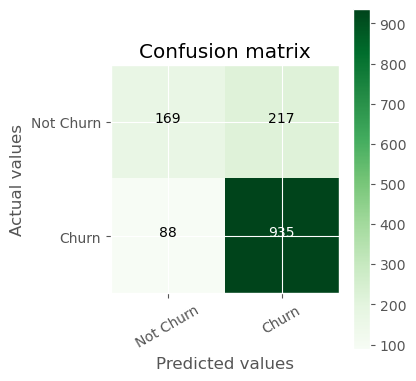

In [53]:
plt.figure(figsize = (4,4), dpi = 100)
plot_confusion_matrix(cm, ['Not Churn', 'Churn'])

In [54]:
(169+935)/ (169+935+217+88)   # 

###  " true positive + true negative 
##---------------------------------
##"true positive + false positive + true negative + false negative"

0.7835344215755855

In [55]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,pred_train)
test_accuracy = accuracy_score(y_test,pred_test)


print('Training Accuracy :', train_accuracy)

print('Testing Accuracy :', test_accuracy)

Training Accuracy : 0.7933972310969116
Testing Accuracy : 0.7835344215755855


In [56]:
print('The Model has an accuarcy of', round(accuracy_score(y_test, pred_test)*100,2), '%')

The Model has an accuarcy of 78.35 %


##------------------------------------------

# KNN

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.5,random_state= 5)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
Knc = KNeighborsClassifier(n_neighbors= 4)
Knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [59]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
train_accuracy_knn = accuracy_score(y_train,pred_train)
test_accuracy_knn = accuracy_score(y_test,pred_test)


print('Training Accuracy :', train_accuracy)
print('Testing Accuracy :', test_accuracy)

Training Accuracy : 0.7933972310969116
Testing Accuracy : 0.7835344215755855


In [61]:
print('This model has accuracy of',round(accuracy_score(y_test,pred_test)*100,2),'%')

This model has accuracy of 78.99 %


##### if its high
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

###### if its low
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

# ----------------------------------------------------------------

# Decision Tree

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state= 5)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4, max_features = 3, 
                                    max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                    min_samples_split = 2, min_impurity_split = None)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=3)

In [64]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)


In [65]:
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Aaccurcy : ', accuracy_score(y_test , pred_test))



Training Accuracy :  0.7933972310969116
Testing  Aaccurcy :  0.7835344215755855


In [66]:
print('This model has accuracy of',round(accuracy_score(y_test,pred_test)*100,2),'%')

This model has accuracy of 78.35 %


### Random Forest

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 4)

In [68]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators= 10, criterion="entropy")
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)



In [70]:
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Aaccurcy : ', accuracy_score(y_test , pred_test))




Training Accuracy :  0.7939297124600639
Testing  Aaccurcy :  0.7814052519517388


In [71]:
print('This model has accuracy of',round(accuracy_score(y_test,pred_test)*100,2),'%')

This model has accuracy of 78.14 %


#### Support vector machines

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state= 12)

In [73]:
from sklearn.svm import SVC
s1 = SVC(kernel='linear')
s1.fit(x_train,y_train)

SVC(kernel='linear')

In [74]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)


In [75]:
print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Aaccurcy : ', accuracy_score(y_test , pred_test))


Training Accuracy :  0.7892494929006085
Testing  Aaccurcy :  0.79649787032655


In [76]:
print('This model has accuracy of',round(accuracy_score(y_test,pred_test)*100,2),'%')

This model has accuracy of 79.65 %


###-----------------------------------------------------------------------------

###### Conclusion :
- All the models gave similar accuracy points 78%.
- Support vector gave 79 %.
best model so far. 